In [77]:
import pandas as pd
import similarity

backend_cards = similarity.make(package="backend:backends", key="cards", use_cache=False)
all_metrics = similarity.make(package="backend:backends", key="metric_names", use_cache=False)

backend_metrics = {
    k: [metric in backend["metrics"] for metric in all_metrics]
    for k, backend in backend_cards.items()
}

backend_df = pd.DataFrame.from_dict(backend_metrics, orient="index", columns=all_metrics)
print(backend_df)

            procrustes    cca  svcca    cka    rsa    pls
netrep            True   True   True  False  False  False
brainscore       False  False  False   True  False   True
yuanli2333       False  False  False   True  False  False
rsatoolbox       False  False  False  False   True  False


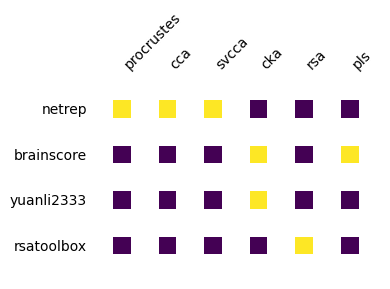

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3), dpi=100)
sns.heatmap(backend_df, annot=False, cmap="viridis", cbar=False, linewidths=20, linecolor='white')
# plt.ylabel("Backends")
# plt.xlabel("Metrics")
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top') 
plt.tick_params(length=0)  # Removing the small tick bars
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=0, va='center')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [46]:
backend_metrics = similarity.make(package="backend:backends", key="metric_by_backend", use_cache=False)
print(backend_metrics)

backend_by_metric = similarity.make(package="backend:backends", key="backend_by_metric", use_cache=False)
print(backend_by_metric)

{'netrep': ['procrustes', 'cca', 'svcca', 'cka'], 'brainscore': ['pls', 'cka', 'rsa'], 'yuanli2333': ['cka'], 'rsatoolbox': ['rsa']}
{'procrustes': ['netrep'], 'cca': ['netrep'], 'svcca': ['netrep'], 'cka': ['netrep', 'brainscore', 'yuanli2333'], 'rsa': ['brainscore', 'rsatoolbox'], 'pls': ['brainscore']}
